**Análise de Turnover**

---

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Leitura do dataset e visualização dos dados
dataset_turnover = pd.read_csv(
    "employee_attrition_data.csv",
    index_col="Employee_ID"
    )
dataset_turnover.head(5)

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
Employee_ID,,,,,,,,,,
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [19]:
# Verificação de Valores Nulos e Duplicados
print("\nValores nulos por coluna:")
print(dataset_turnover.isnull().sum())

print("\nTotal de valores nulos:", dataset_turnover.isnull().sum().sum())

print("\nQuantidade de linhas duplicadas:")
print(dataset_turnover.duplicated().sum())


Valores nulos por coluna:
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

Total de valores nulos: 0

Quantidade de linhas duplicadas:
0


In [20]:
print("\nInformações gerais do dataset:")
dataset_turnover.info()


Informações gerais do dataset:
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   str    
 2   Department             1000 non-null   str    
 3   Job_Title              1000 non-null   str    
 4   Years_at_Company       1000 non-null   int64  
 5   Satisfaction_Level     1000 non-null   float64
 6   Average_Monthly_Hours  1000 non-null   int64  
 7   Promotion_Last_5Years  1000 non-null   int64  
 8   Salary                 1000 non-null   int64  
 9   Attrition              1000 non-null   int64  
dtypes: float64(1), int64(6), str(3)
memory usage: 78.3 KB


In [22]:
print("\nEstatísticas Descritivas das Variáveis:")
print(dataset_turnover.describe())


Estatísticas Descritivas das Variáveis:
               Age  Years_at_Company  Satisfaction_Level  \
count  1000.000000       1000.000000         1000.000000   
mean     42.205000          5.605000            0.505995   
std      10.016452          2.822223            0.289797   
min      25.000000          1.000000            0.001376   
25%      33.000000          3.000000            0.258866   
50%      43.000000          6.000000            0.505675   
75%      51.000000          8.000000            0.761135   
max      59.000000         10.000000            0.999979   

       Average_Monthly_Hours  Promotion_Last_5Years        Salary    Attrition  
count            1000.000000            1000.000000   1000.000000  1000.000000  
mean              199.493000               0.486000  64624.980000     0.495000  
std                29.631908               0.500054  20262.984333     0.500225  
min               150.000000               0.000000  30099.000000     0.000000  
25%          

In [24]:
#Calculando a proporção de Turnover da empresa
print("Proporção de Turnover da empresa:")
dataset_turnover["Attrition"].value_counts()
dataset_turnover["Attrition"].value_counts(normalize=True)

Proporção de Turnover da empresa:


Attrition
0    0.505
1    0.495
Name: proportion, dtype: float64

In [25]:
dataset_turnover.groupby("Attrition").mean(numeric_only=True)

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary
Attrition,,,,,,
0,42.291089,5.596040,0.508748,200.188119,0.477228,65383.287129
1,42.117172,5.614141,0.503186,198.783838,0.494949,63851.353535


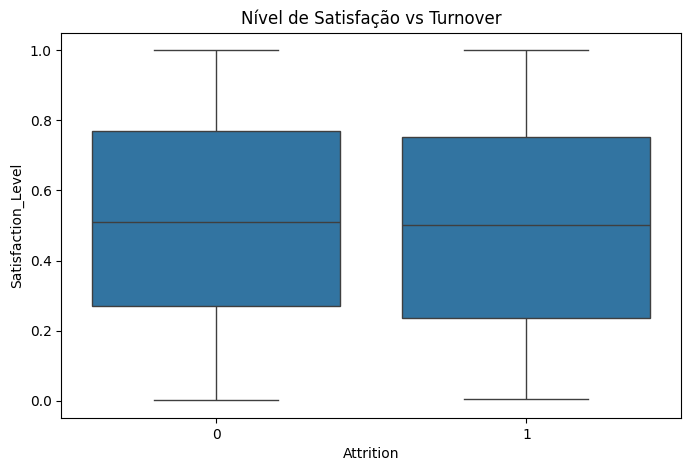

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=dataset_turnover, x="Attrition", y="Satisfaction_Level")
plt.title("Nível de Satisfação vs Turnover")
plt.show()

In [34]:
attrition_by_dept = (
    dataset_turnover.groupby("Department")["Attrition"]
    .mean()
    .sort_values(ascending=False)
)

print(attrition_by_dept)


Department
Engineering    0.534314
Finance        0.519417
HR             0.502618
Sales          0.492823
Marketing      0.421053
Name: Attrition, dtype: float64


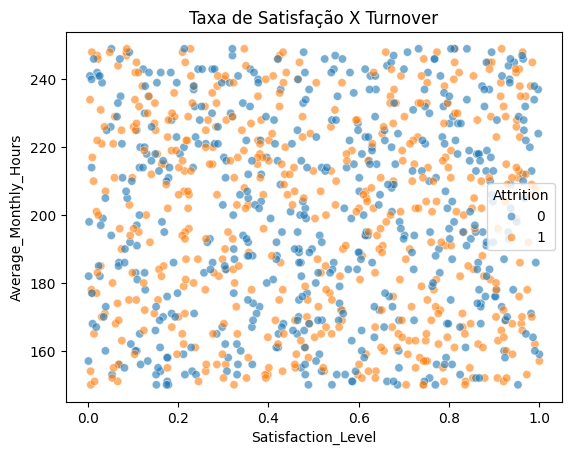

In [36]:
sns.scatterplot(
    data=dataset_turnover,
    x="Satisfaction_Level",
    y="Average_Monthly_Hours",
    hue="Attrition",
    alpha=0.6
)
plt.title("Taxa de Satisfação X Turnover")
plt.show()

In [37]:
corr = dataset_turnover.corr(numeric_only=True)
print(corr["Attrition"].sort_values(ascending=False))

Attrition                1.000000
Promotion_Last_5Years    0.017728
Years_at_Company         0.003208
Age                     -0.008685
Satisfaction_Level      -0.009601
Average_Monthly_Hours   -0.023706
Salary                  -0.037818
Name: Attrition, dtype: float64


In [40]:
pd.crosstab(dataset_turnover['Gender'], dataset_turnover['Attrition'], normalize='index')

Attrition,0,1
Gender,,
Female,0.487854,0.512146
Male,0.521739,0.478261


In [42]:
pd.crosstab(dataset_turnover['Job_Title'], dataset_turnover['Attrition'], normalize='index')

Attrition,0,1
Job_Title,,
Accountant,0.490291,0.509709
Analyst,0.523077,0.476923
Engineer,0.528037,0.471963
HR Specialist,0.486034,0.513966
Manager,0.495146,0.504854


In [43]:
dataset_turnover.groupby('Attrition')['Years_at_Company'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,505.0,5.596040,2.829687,1.0,3.0,6.0,8.0,10.0
1,495.0,5.614141,2.817420,1.0,3.0,6.0,8.0,10.0
